#SMS Spam Classification using NLP

##Step 01 - Reading Data & Visualization

###Import modules

In [34]:
import pandas as pd
import nltk

###Read Dataset

In [35]:
df = pd.read_csv("spam.csv",  encoding="latin-1")

In [36]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
df.shape

(5572, 5)

In [38]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [39]:
df.rename(columns={'v1':'class', 'v2':'sms'},inplace=True)
df.shape


(5572, 2)

In [40]:
df.sample(5)

,class,sms
4072,ham,Was the actual exam harder than NBME
3903,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...
4416,ham,says that he's quitting at least5times a day ...
1717,spam,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...
487,ham,Dear reached railway. What happen to you


In [41]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [42]:
df = df.drop_duplicates(keep='first')

In [43]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516                         Rofl. Its true to its name    1
spam    653    653  This is the 2nd time we have tried 2 contact u...    1

###Data Visualization

In [44]:
df = df.copy()
df["Length"] = df["sms"].apply(len)

In [45]:
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

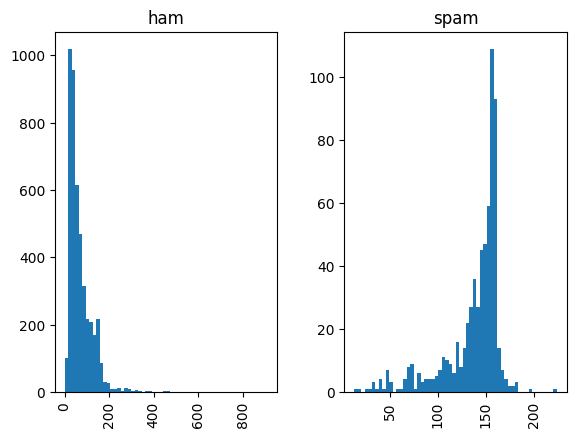

In [46]:
df.hist(column='Length', by='class', bins=58)

## Step 02 - Preprocessing

In [47]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Preprocessing Task:
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming

In [49]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [50]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

In [51]:
df.head(5)


,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


##Step 03 - Feature Extraction

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tf_vec = TfidfVectorizer(max_features=3000)
x = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [55]:
x.shape

(5169, 3000)

In [56]:
y = df['class'].values

##Step 04 - Learning

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [58]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [59]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9709864603481625
